In [11]:
import pandas, numpy
import matplotlib.pyplot as plt
from matplotlib import rc

In [12]:
# LOAD DATA
def load_data(path):
    
    data_raw = open(path + '_distr.csv', encoding = 'utf-8').read()
    data_list = data_raw.split('\n')
  
    data_list_remove_empty_last_line = []
    for row in range(0, len(data_list)-1):
        data_list_remove_empty_last_line.append(data_list[row])
    
    input_table = [row.split(';') for row in data_list]

    return input_table

In [13]:
# CALCULATE NUMBER OF TOPICS
def calculate_nr_topics(work_table):
    
    work_table_df = pandas.DataFrame(work_table)
    y = numpy.array(work_table_df[len(work_table[0])-1]) 
    n_topics = numpy.unique(y)   # ['1' '2' '3' '4' '5' '6' '7'...]
    
    return n_topics

In [23]:
# CREATE 100% STACKED BAR CHART FROM DISTRIBUTION OF THE DOMINANT TOPICS PER AGE GROUP
def create_stacked_bar_for_ages(input_table):

    # EXTRACT AGE AND DOMINANT TOPIC
    work_table = []
    for i in range (1, len(input_table)-1):
        work_table.append([input_table[i][3], input_table[i][len(input_table[i])-1]])

    n_topics = calculate_nr_topics(work_table)

    # COUNT NUMBER OF DOCUMENTS WITH THE SAME DOMINANT TOPIC
    young = [0] * len(n_topics)
    old = [0] * len(n_topics)

    for row in work_table:
        if row[0] == 'y':
            young[int(row[len(row) - 1]) - 1] += 1
        else:
            old[int(row[len(row) - 1]) - 1] += 1

    print(young)
    print(old)
    
    raw_data = {'blueBars': young, 'orangeBars': old}
    chart_df = pandas.DataFrame(raw_data)

    # ABSOLUTE VALUE -> PERCENTAGE
    totals = [i + j for i, j in zip(chart_df['blueBars'], chart_df['orangeBars'])]
    blueBars = [i / j * 100 for i, j in zip(chart_df['blueBars'], totals)]
    orangeBars = [i / j * 100 for i, j in zip(chart_df['orangeBars'], totals)]

    # CUSTOMIZE AND PLOT
    barWidth = 0.85
    plt.bar(n_topics, blueBars, color='#4848B7', edgecolor='white', width=barWidth, label = 'young')
    plt.bar(n_topics, orangeBars, bottom=blueBars, color='#FF8500', edgecolor='white', width=barWidth, label = 'old')
    plt.xticks(n_topics)
    plt.xlabel("topics")
    plt.title("DISTRIBUTION OF DOMINANT TOPICS / AGE GROUP")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.show()
    
    return None

In [15]:
# CREATE 100% STACKED BAR CHART FROM DISTRIBUTION OF THE DOMINANT TOPICS PER TEMPORAL FOCUS
def create_stacked_bar_for_time_focus(input_table):

    # EXTRACT TEMPORAL FOCUS AND DOMINANT TOPIC
    work_table = []
    for i in range (1, len(input_table)-1):
        work_table.append([input_table[i][10], input_table[i][11], input_table[i][len(input_table[i])-1]])

    n_topics = calculate_nr_topics(work_table)

    # COUNT NUMBER OF DOCUMENTS WITH THE SAME DOMINANT TOPIC
    past = [0] * len(n_topics)
    future = [0] * len(n_topics)

    for row in work_table:
        if row[0] == '1':
            past[int(row[len(row) - 1]) - 1] += 1
        if row[1].replace('"', '') == '1':
            future[int(row[len(row) - 1]) - 1] += 1

    print(past)
    print(future)
    
    raw_data = {'greyBars': past, 'yellowBars': future}
    chart_df = pandas.DataFrame(raw_data)

    # ABSOLUTE VALUE -> PERCENTAGE
    totals = [i + j for i, j in zip(chart_df['greyBars'], chart_df['yellowBars'])]
    greyBars = [i / j * 100 for i, j in zip(chart_df['greyBars'], totals)]
    yellowBars = [i / j * 100 for i, j in zip(chart_df['yellowBars'], totals)]

    # CUSTOMIZE AND PLOT
    barWidth = 0.85
    plt.bar(n_topics, greyBars, color='#c9c7b0', edgecolor='white', width=barWidth, label = 'past')
    plt.bar(n_topics, yellowBars, bottom=greyBars, color='#ebdd31', edgecolor='white', width=barWidth, label = 'future')
    plt.xticks(n_topics)
    plt.title("DISTRIBUTION OF DOMINANT TOPICS / TIME FOCUS")
    plt.xlabel("topics")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.show()
    
    return None

In [16]:
# CREATE 100% STACKED BAR CHART FROM DISTRIBUTION OF THE DOMINANT TOPICS PER INTERLOCUTOR
def create_stacked_bar_for_interlocutor(input_table):

    # EXTRACT INTERLOCUTOR AND DOMINANT TOPIC
    work_table = []
    for i in range (1, len(input_table)-1):
        # PARTNER, FAMILY, FRIEND, STRANGER
        work_table.append([input_table[i][6], input_table[i][7], input_table[i][8], input_table[i][9], input_table[i][len(input_table[i])-1]])

    n_topics = calculate_nr_topics(work_table)

    # COUNT NUMBER OF DOCUMENTS WITH THE SAME DOMINANT TOPIC
    partner = [0] * len(n_topics)
    family = [0] * len(n_topics)
    friend = [0] * len(n_topics)
    stranger = [0] * len(n_topics)

    for row in work_table:
        if row[0] == '1':
            partner[int(row[len(row) - 1]) - 1] += 1
        if row[1] == '1':
            family[int(row[len(row) - 1]) - 1] += 1
        if row[2] == '1':
            friend[int(row[len(row) - 1]) - 1] += 1
        if row[3] == '1':
            stranger[int(row[len(row) - 1]) - 1] += 1

    print(partner)
    print(family)
    print(friend)
    print(stranger)
                
    raw_data = {'greyBars': partner, 'greenBars': family, 'orangeBars': friend, 'blackBars': stranger}    
    chart_df = pandas.DataFrame(raw_data)

    # ABSOLUTE VALUE -> PERCENTAGE
    totals = [i + j + k + l for i, j, k, l in zip(chart_df['greyBars'], chart_df['greenBars'], chart_df['orangeBars'], chart_df['blackBars'])]
    greyBars = [i / j * 100 for i, j in zip(chart_df['greyBars'], totals)]
    greenBars = [i / j * 100 for i, j in zip(chart_df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i, j in zip(chart_df['orangeBars'], totals)]
    blackBars = [i / j * 100 for i, j in zip(chart_df['blackBars'], totals)]

    # CUSTOMIZE AND PLOT
    barWidth = 0.85
    plt.bar(n_topics, greyBars, color='#d3d3d3', edgecolor='white', width=barWidth, label = 'partner')
    plt.bar(n_topics, greenBars, bottom=greyBars, color='#a2e000', edgecolor='white', width=barWidth, label = 'family')
    plt.bar(n_topics, orangeBars, bottom=[i+j for i,j in zip(greyBars, greenBars)], color='#ffaf00', edgecolor='white', width=barWidth, label = 'friend')
    plt.bar(n_topics, blackBars, bottom=[i + j + k for i, j, k in zip(greyBars, greenBars, orangeBars)], color='#000000', edgecolor='white', width=barWidth, label = 'stranger')
    plt.xticks(n_topics)
    plt.xlabel("topics")

    
    plt.title("DISTRIBUTION OF DOMINANT TOPICS / INTERLOCUTOR")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.show()
    
    return None

[52, 167, 112, 175, 378, 374, 819, 342]
[35, 164, 90, 162, 266, 282, 598, 275]


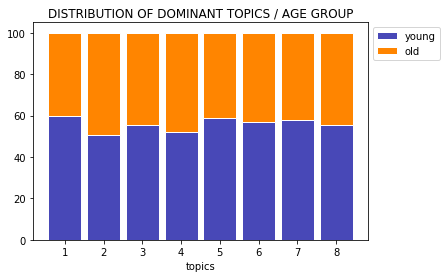

[18, 82, 46, 73, 133, 130, 280, 151]
[6, 56, 34, 28, 54, 68, 171, 46]


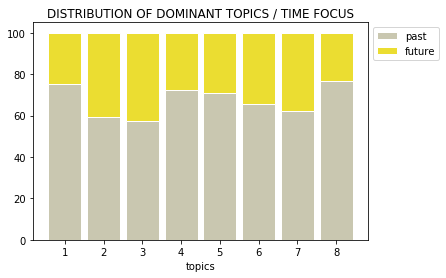

[24, 85, 53, 92, 172, 175, 346, 174]
[9, 56, 31, 70, 93, 94, 196, 98]
[57, 163, 100, 141, 313, 299, 704, 278]
[2, 14, 7, 26, 15, 28, 39, 23]


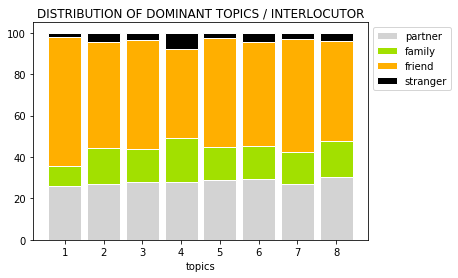

In [25]:
# TUNERS
folder = './IO_YO/TM_NMF_5/'
models = ['NMF_TFIDF_FR', 'NMF_TFIDF_KL', 'NMF_TF_FR', 'NMF_TF_KL']
model = models[2]
min_df = 2
max_df = 70
n_topics = 8

# EXECUTE
path = folder + model + '_min' + str(min_df) + '_max' + str(max_df) + '_k' + str(n_topics)
input_table = load_data(path)

create_stacked_bar_for_ages(input_table)
plt.show()
create_stacked_bar_for_time_focus(input_table)
plt.show()
create_stacked_bar_for_interlocutor(input_table)
plt.show()